# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [107]:
import pandas as pd

In [108]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [109]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [110]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

### Clean the Data

In [111]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

**Normalize**

In [112]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [113]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


### Feature Columns

In [114]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class'],
      dtype='object')

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

### Encode Age to Age Groups

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

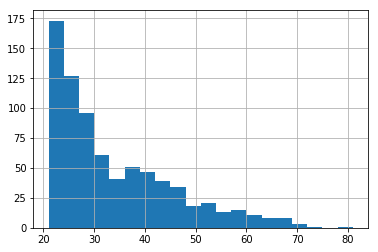

In [116]:
diabetes['Age'].hist(bins=20)

In [117]:
bins = [0,30,50,70,100]
labels =[0,1,2,3]
diabetes["Age_buckets"] = pd.cut(diabetes["Age"],bins=bins, labels=labels, include_lowest=True)

### Putting them together

### Train Test Split

In [118]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Age_buckets
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,1


In [119]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Age_buckets              768 non-null category
dtypes: category(1), float64(7), int64(2)
memory usage: 55.0 KB


In [120]:
x_data = diabetes.drop(['Age','Class'],axis=1)

In [121]:
labels = diabetes['Class']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [124]:
y_train.shape

(514,)

In [125]:
X_train.shape

(514, 8)

# Tensorflow

In [126]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [127]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [128]:
n_features = X_train.shape[1]
n_classes = y_train_cat.shape[1]

In [129]:
w_shape = (n_features, n_classes)
b_shape = (1, n_classes)

### Variables

In [130]:
W = tf.Variable(initial_value = tf.random.normal(shape = w_shape))
b = tf.Variable(initial_value = tf.random.normal(shape = b_shape))

### Placeholders

In [131]:
X = tf.placeholder(tf.float32)
y_true = tf.placeholder(tf.float32)

### Graph

In [132]:
y_hat = tf.matmul(X,W) + b

### Loss Function

In [133]:
loss = tf.losses.softmax_cross_entropy(y_true, y_hat)

### Optimizer

In [140]:
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

### Initialize Variables

In [141]:
init = tf.global_variables_initializer()

### Session

In [144]:
epochs = 50000
history = {'loss':list(),'val_loss':list()}
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        sess.run(train,{X:X_train, y_true:y_train_cat})
        
        history['loss'].append(sess.run(loss, {X: X_train, y_true: y_train_cat})) 
        history['val_loss'].append(sess.run(loss, {X: X_test, y_true: y_test_cat})) 
        
        if epoch % 100 == 0:
            print("Iteration {}:\tloss={:.6f}:\tval_loss={:.6f}"
                  .format(epoch, history['loss'][epoch], history['val_loss'][epoch]))
            
    y_pred = sess.run(y_hat, {X: X_test})
    W_final, b_final = sess.run([W, b])

Iteration 0:	loss=2.105391:	val_loss=2.179719
Iteration 100:	loss=0.590359:	val_loss=0.601021
Iteration 200:	loss=0.578403:	val_loss=0.588743
Iteration 300:	loss=0.571103:	val_loss=0.580675
Iteration 400:	loss=0.565065:	val_loss=0.573643
Iteration 500:	loss=0.559622:	val_loss=0.567185
Iteration 600:	loss=0.554612:	val_loss=0.561211
Iteration 700:	loss=0.549978:	val_loss=0.555688
Iteration 800:	loss=0.545681:	val_loss=0.550586
Iteration 900:	loss=0.541692:	val_loss=0.545872
Iteration 1000:	loss=0.537985:	val_loss=0.541516
Iteration 1100:	loss=0.534535:	val_loss=0.537487
Iteration 1200:	loss=0.531320:	val_loss=0.533758
Iteration 1300:	loss=0.528321:	val_loss=0.530302
Iteration 1400:	loss=0.525519:	val_loss=0.527096
Iteration 1500:	loss=0.522899:	val_loss=0.524119
Iteration 1600:	loss=0.520446:	val_loss=0.521352
Iteration 1700:	loss=0.518146:	val_loss=0.518777
Iteration 1800:	loss=0.515987:	val_loss=0.516377
Iteration 1900:	loss=0.513959:	val_loss=0.514140
Iteration 2000:	loss=0.512051:	v

Iteration 16700:	loss=0.469548:	val_loss=0.474441
Iteration 16800:	loss=0.469529:	val_loss=0.474442
Iteration 16900:	loss=0.469510:	val_loss=0.474443
Iteration 17000:	loss=0.469491:	val_loss=0.474444
Iteration 17100:	loss=0.469473:	val_loss=0.474445
Iteration 17200:	loss=0.469456:	val_loss=0.474446
Iteration 17300:	loss=0.469439:	val_loss=0.474448
Iteration 17400:	loss=0.469422:	val_loss=0.474450
Iteration 17500:	loss=0.469405:	val_loss=0.474452
Iteration 17600:	loss=0.469389:	val_loss=0.474454
Iteration 17700:	loss=0.469374:	val_loss=0.474456
Iteration 17800:	loss=0.469358:	val_loss=0.474459
Iteration 17900:	loss=0.469343:	val_loss=0.474461
Iteration 18000:	loss=0.469328:	val_loss=0.474464
Iteration 18100:	loss=0.469314:	val_loss=0.474467
Iteration 18200:	loss=0.469300:	val_loss=0.474469
Iteration 18300:	loss=0.469286:	val_loss=0.474472
Iteration 18400:	loss=0.469273:	val_loss=0.474476
Iteration 18500:	loss=0.469260:	val_loss=0.474479
Iteration 18600:	loss=0.469247:	val_loss=0.474482


Iteration 33100:	loss=0.468681:	val_loss=0.475111
Iteration 33200:	loss=0.468681:	val_loss=0.475114
Iteration 33300:	loss=0.468680:	val_loss=0.475117
Iteration 33400:	loss=0.468679:	val_loss=0.475120
Iteration 33500:	loss=0.468679:	val_loss=0.475123
Iteration 33600:	loss=0.468678:	val_loss=0.475125
Iteration 33700:	loss=0.468678:	val_loss=0.475128
Iteration 33800:	loss=0.468677:	val_loss=0.475131
Iteration 33900:	loss=0.468677:	val_loss=0.475134
Iteration 34000:	loss=0.468676:	val_loss=0.475136
Iteration 34100:	loss=0.468676:	val_loss=0.475139
Iteration 34200:	loss=0.468675:	val_loss=0.475142
Iteration 34300:	loss=0.468675:	val_loss=0.475145
Iteration 34400:	loss=0.468674:	val_loss=0.475147
Iteration 34500:	loss=0.468674:	val_loss=0.475150
Iteration 34600:	loss=0.468673:	val_loss=0.475153
Iteration 34700:	loss=0.468673:	val_loss=0.475155
Iteration 34800:	loss=0.468672:	val_loss=0.475158
Iteration 34900:	loss=0.468672:	val_loss=0.475160
Iteration 35000:	loss=0.468672:	val_loss=0.475163


Iteration 49500:	loss=0.468652:	val_loss=0.475370
Iteration 49600:	loss=0.468652:	val_loss=0.475370
Iteration 49700:	loss=0.468652:	val_loss=0.475371
Iteration 49800:	loss=0.468652:	val_loss=0.475372
Iteration 49900:	loss=0.468652:	val_loss=0.475372


### Results

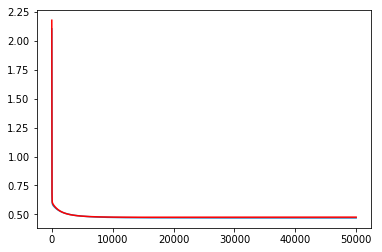

In [145]:
plt.plot(history['loss'])
plt.plot(history['val_loss'],'r')

### Predict

In [138]:
import numpy as np

In [139]:
predicted_y_values = np.argmax(y_pred, axis=1)

In [82]:
predicted_y_values

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

## Keras

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical

In [31]:
model = Sequential()
#model.add(Dense(2,input_shape = (X_train.shape[1],),activation = 'softmax'))
model.add(Dense(20,input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
#model.add(Dense(10,activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [32]:
adam = Adam(0.01)
#sgd = SGD(0.005)

In [33]:
y_binary_train= to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [35]:
H = model.fit(X_train, y_binary_train, validation_data=(X_test, y_binary_test),epochs = 500)

Train on 514 samples, validate on 254 samples
Epoch 1/500
514/514 [==============================] - 1s 3ms/step - loss: 0.6751 - acc: 0.6167 - val_loss: 0.6416 - val_acc: 0.6575
Epoch 2/500
514/514 [==============================] - 0s 146us/step - loss: 0.6355 - acc: 0.6479 - val_loss: 0.6100 - val_acc: 0.6496
Epoch 3/500
514/514 [==============================] - 0s 151us/step - loss: 0.6130 - acc: 0.6693 - val_loss: 0.5975 - val_acc: 0.6575
Epoch 4/500
514/514 [==============================] - 0s 159us/step - loss: 0.6033 - acc: 0.6615 - val_loss: 0.5677 - val_acc: 0.7283
Epoch 5/500
514/514 [==============================] - 0s 152us/step - loss: 0.5710 - acc: 0.7101 - val_loss: 0.5517 - val_acc: 0.7480
Epoch 6/500
514/514 [==============================] - 0s 148us/step - loss: 0.5774 - acc: 0.7101 - val_loss: 0.5479 - val_acc: 0.7087
Epoch 7/500
514/514 [==============================] - 0s 145us/step - loss: 0.5526 - acc: 0.6984 - val_loss: 0.5343 - val_acc: 0.7323
Epoch 8/500

Epoch 61/500
514/514 [==============================] - 0s 132us/step - loss: 0.4529 - acc: 0.7840 - val_loss: 0.4884 - val_acc: 0.7992
Epoch 62/500
514/514 [==============================] - 0s 144us/step - loss: 0.4426 - acc: 0.7860 - val_loss: 0.4788 - val_acc: 0.7677
Epoch 63/500
514/514 [==============================] - 0s 147us/step - loss: 0.4406 - acc: 0.7996 - val_loss: 0.4705 - val_acc: 0.7913
Epoch 64/500
514/514 [==============================] - 0s 144us/step - loss: 0.4367 - acc: 0.7899 - val_loss: 0.4739 - val_acc: 0.8031
Epoch 65/500
514/514 [==============================] - 0s 141us/step - loss: 0.4486 - acc: 0.7840 - val_loss: 0.4888 - val_acc: 0.7638
Epoch 66/500
514/514 [==============================] - 0s 144us/step - loss: 0.4349 - acc: 0.7840 - val_loss: 0.4667 - val_acc: 0.7756
Epoch 67/500
514/514 [==============================] - 0s 153us/step - loss: 0.4336 - acc: 0.7840 - val_loss: 0.4677 - val_acc: 0.7953
Epoch 68/500
514/514 [==========================

514/514 [==============================] - 0s 190us/step - loss: 0.4467 - acc: 0.7763 - val_loss: 0.4642 - val_acc: 0.7992
Epoch 122/500
514/514 [==============================] - 0s 184us/step - loss: 0.4440 - acc: 0.7918 - val_loss: 0.4624 - val_acc: 0.7874
Epoch 123/500
514/514 [==============================] - 0s 187us/step - loss: 0.4313 - acc: 0.7763 - val_loss: 0.4670 - val_acc: 0.7874
Epoch 124/500
514/514 [==============================] - 0s 170us/step - loss: 0.4307 - acc: 0.7938 - val_loss: 0.4745 - val_acc: 0.7756
Epoch 125/500
514/514 [==============================] - 0s 180us/step - loss: 0.4330 - acc: 0.7938 - val_loss: 0.4699 - val_acc: 0.7795
Epoch 126/500
514/514 [==============================] - 0s 185us/step - loss: 0.4301 - acc: 0.7860 - val_loss: 0.4817 - val_acc: 0.7638
Epoch 127/500
514/514 [==============================] - 0s 167us/step - loss: 0.4317 - acc: 0.7899 - val_loss: 0.4759 - val_acc: 0.7756
Epoch 128/500
514/514 [==============================] 

Epoch 181/500
514/514 [==============================] - 0s 168us/step - loss: 0.4246 - acc: 0.7899 - val_loss: 0.4841 - val_acc: 0.7638
Epoch 182/500
514/514 [==============================] - 0s 158us/step - loss: 0.4203 - acc: 0.7879 - val_loss: 0.4801 - val_acc: 0.7717
Epoch 183/500
514/514 [==============================] - 0s 165us/step - loss: 0.4220 - acc: 0.7840 - val_loss: 0.4809 - val_acc: 0.7598
Epoch 184/500
514/514 [==============================] - 0s 164us/step - loss: 0.4219 - acc: 0.7840 - val_loss: 0.4842 - val_acc: 0.7520
Epoch 185/500
514/514 [==============================] - 0s 177us/step - loss: 0.4212 - acc: 0.7899 - val_loss: 0.4774 - val_acc: 0.7795
Epoch 186/500
514/514 [==============================] - 0s 160us/step - loss: 0.4207 - acc: 0.7879 - val_loss: 0.4861 - val_acc: 0.7992
Epoch 187/500
514/514 [==============================] - 0s 167us/step - loss: 0.4188 - acc: 0.7918 - val_loss: 0.4891 - val_acc: 0.7559
Epoch 188/500
514/514 [==================

Epoch 241/500
514/514 [==============================] - 0s 154us/step - loss: 0.4106 - acc: 0.7957 - val_loss: 0.5011 - val_acc: 0.7598
Epoch 242/500
514/514 [==============================] - 0s 135us/step - loss: 0.4209 - acc: 0.7938 - val_loss: 0.4919 - val_acc: 0.7717
Epoch 243/500
514/514 [==============================] - 0s 136us/step - loss: 0.4114 - acc: 0.7996 - val_loss: 0.5328 - val_acc: 0.7992
Epoch 244/500
514/514 [==============================] - 0s 145us/step - loss: 0.4681 - acc: 0.7529 - val_loss: 0.4929 - val_acc: 0.7677
Epoch 245/500
514/514 [==============================] - 0s 135us/step - loss: 0.4171 - acc: 0.8016 - val_loss: 0.4914 - val_acc: 0.7756
Epoch 246/500
514/514 [==============================] - 0s 138us/step - loss: 0.4706 - acc: 0.7685 - val_loss: 0.4814 - val_acc: 0.7835
Epoch 247/500
514/514 [==============================] - 0s 141us/step - loss: 0.4233 - acc: 0.7977 - val_loss: 0.4935 - val_acc: 0.7480
Epoch 248/500
514/514 [==================

Epoch 301/500
514/514 [==============================] - 0s 170us/step - loss: 0.4012 - acc: 0.7918 - val_loss: 0.5146 - val_acc: 0.7638
Epoch 302/500
514/514 [==============================] - 0s 152us/step - loss: 0.3948 - acc: 0.8132 - val_loss: 0.5016 - val_acc: 0.7795
Epoch 303/500
514/514 [==============================] - 0s 144us/step - loss: 0.3943 - acc: 0.8074 - val_loss: 0.5154 - val_acc: 0.7677
Epoch 304/500
514/514 [==============================] - 0s 136us/step - loss: 0.3976 - acc: 0.8074 - val_loss: 0.5092 - val_acc: 0.7717
Epoch 305/500
514/514 [==============================] - 0s 140us/step - loss: 0.3952 - acc: 0.8074 - val_loss: 0.5152 - val_acc: 0.7598
Epoch 306/500
514/514 [==============================] - 0s 136us/step - loss: 0.4037 - acc: 0.8016 - val_loss: 0.4910 - val_acc: 0.7717
Epoch 307/500
514/514 [==============================] - 0s 140us/step - loss: 0.3994 - acc: 0.8171 - val_loss: 0.4939 - val_acc: 0.7677
Epoch 308/500
514/514 [==================

Epoch 361/500
514/514 [==============================] - 0s 167us/step - loss: 0.3848 - acc: 0.8152 - val_loss: 0.5185 - val_acc: 0.7795
Epoch 362/500
514/514 [==============================] - 0s 141us/step - loss: 0.3898 - acc: 0.8152 - val_loss: 0.5070 - val_acc: 0.7638
Epoch 363/500
514/514 [==============================] - 0s 148us/step - loss: 0.3947 - acc: 0.8016 - val_loss: 0.5125 - val_acc: 0.7598
Epoch 364/500
514/514 [==============================] - 0s 155us/step - loss: 0.3831 - acc: 0.8093 - val_loss: 0.5243 - val_acc: 0.7559
Epoch 365/500
514/514 [==============================] - 0s 175us/step - loss: 0.3883 - acc: 0.8132 - val_loss: 0.5047 - val_acc: 0.7677
Epoch 366/500
514/514 [==============================] - 0s 145us/step - loss: 0.3895 - acc: 0.8074 - val_loss: 0.5155 - val_acc: 0.7559
Epoch 367/500
514/514 [==============================] - 0s 148us/step - loss: 0.3901 - acc: 0.8171 - val_loss: 0.5199 - val_acc: 0.7520
Epoch 368/500
514/514 [==================

Epoch 421/500
514/514 [==============================] - 0s 162us/step - loss: 0.3793 - acc: 0.8191 - val_loss: 0.5514 - val_acc: 0.7480
Epoch 422/500
514/514 [==============================] - 0s 166us/step - loss: 0.3826 - acc: 0.8191 - val_loss: 0.5380 - val_acc: 0.7913
Epoch 423/500
514/514 [==============================] - 0s 158us/step - loss: 0.4205 - acc: 0.8016 - val_loss: 0.5116 - val_acc: 0.7913
Epoch 424/500
514/514 [==============================] - 0s 178us/step - loss: 0.4043 - acc: 0.8074 - val_loss: 0.5464 - val_acc: 0.7441
Epoch 425/500
514/514 [==============================] - 0s 177us/step - loss: 0.4148 - acc: 0.8016 - val_loss: 0.5237 - val_acc: 0.7362
Epoch 426/500
514/514 [==============================] - 0s 165us/step - loss: 0.4024 - acc: 0.8093 - val_loss: 0.5329 - val_acc: 0.7835
Epoch 427/500
514/514 [==============================] - 0s 171us/step - loss: 0.4138 - acc: 0.7879 - val_loss: 0.5375 - val_acc: 0.7677
Epoch 428/500
514/514 [==================

Epoch 481/500
514/514 [==============================] - 0s 160us/step - loss: 0.3820 - acc: 0.8230 - val_loss: 0.5061 - val_acc: 0.7756
Epoch 482/500
514/514 [==============================] - 0s 160us/step - loss: 0.3827 - acc: 0.8132 - val_loss: 0.5088 - val_acc: 0.7598
Epoch 483/500
514/514 [==============================] - 0s 160us/step - loss: 0.3769 - acc: 0.8191 - val_loss: 0.5270 - val_acc: 0.7441
Epoch 484/500
514/514 [==============================] - 0s 166us/step - loss: 0.3837 - acc: 0.8171 - val_loss: 0.5176 - val_acc: 0.7362
Epoch 485/500
514/514 [==============================] - 0s 171us/step - loss: 0.3784 - acc: 0.8152 - val_loss: 0.5078 - val_acc: 0.7362
Epoch 486/500
514/514 [==============================] - 0s 158us/step - loss: 0.3930 - acc: 0.8035 - val_loss: 0.5210 - val_acc: 0.7913
Epoch 487/500
514/514 [==============================] - 0s 153us/step - loss: 0.3971 - acc: 0.8171 - val_loss: 0.5032 - val_acc: 0.7795
Epoch 488/500
514/514 [==================

In [36]:
H.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [87]:
H.history["loss"]

[0.6750992072695424,
 0.6355176904322108,
 0.6130356770081279,
 0.6032960660726644,
 0.570986986392203,
 0.5774284060827025,
 0.552585273865132,
 0.5382056948275882,
 0.528253125541405,
 0.5315893228647773,
 0.5126205768566651,
 0.4989207689632238,
 0.4833240226085084,
 0.49716699216152443,
 0.472051848929216,
 0.48087409243045615,
 0.47473321118707323,
 0.4735036172291648,
 0.4774595383076352,
 0.45127523072962633,
 0.46922269231614433,
 0.45229016203824646,
 0.45945486055273954,
 0.4809655701371946,
 0.4654770305648388,
 0.5142717254764839,
 0.4679625529491484,
 0.46192646719486335,
 0.4747276912055591,
 0.4894593720132275,
 0.45623115493629696,
 0.44694756997698476,
 0.44251994052285815,
 0.4534979696867531,
 0.4398365748995473,
 0.4521517607488521,
 0.47027084080625603,
 0.46472368908299544,
 0.4427279720394528,
 0.44018996202528243,
 0.46042730905666424,
 0.4402770294521569,
 0.4427212289451161,
 0.4422949836643753,
 0.4367937227631357,
 0.44053005058941674,
 0.44170862331928445,


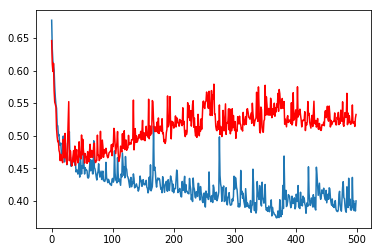

In [106]:
plt.plot(H.history["loss"])
plt.plot(H.history["val_loss"], 'r')

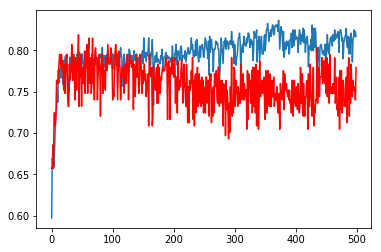

In [107]:
plt.plot(H.history["acc"])
plt.plot(H.history["val_acc"], 'r')

### Predict

In [39]:
y_test.shape

(254,)

In [108]:
y_pred_softmax = model.predict(X_test)

In [109]:
import numpy as np

In [110]:
y_pred = np.argmax(y_pred_softmax, axis=1)